## Import TensorFlow and other libraries

In [1]:
import os

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from random import randrange
from PIL import Image
import random
import matplotlib.animation as animation
import matplotlib.image as mpimg
from sklearn.decomposition import PCA


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras import initializers

2023-05-31 09:20:31.824915: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
from matplotlib.animation import FuncAnimation
from IPython import display
import keras_tuner as kt
from tensorflow.keras import backend as K
import matplotlib.animation as animation

In [4]:
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
tf.config.set_visible_devices([], 'GPU')

2023-05-31 09:20:37.707563: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-31 09:20:37.710068: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-05-31 09:20:37.757536: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:9e:00.0 name: Quadro P400 computeCapability: 6.1
coreClock: 1.2525GHz coreCount: 2 deviceMemorySize: 1.94GiB deviceMemoryBandwidth: 29.88GiB/s
2023-05-31 09:20:37.757592: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-05-31 09:20:37.821590: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-05-31 09:20:37.821812: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2023-05-31 

## Load the dataset
/!\ ATTENTION /!\ Il faut construire le modèle de l'AE1 (en le chargeant) ensuite importer la BDD, en effet, ici on travaille sur l'AE2 avec toute la BDD (60.000) ce qui ne pouvait pas être fait avec ma machine /!\ 

In [6]:
#type de simulation désirée
physique="single_pendulum"

In [9]:
#ON importe la base de données, chaque élément importé est transformé via le AE1 importé au préalable
n=60000
size=128
Bdd_train=[]
prediction_train=[]

Bdd_test=[]
prediction_test=[]
k=0
Nombre_images_voulues=5000
Nombre_fichiers=int(n/57)
indice_train=int(Nombre_fichiers*0.8)
indice_test=n


for i in range(0,indice_train):
    folder=i
    print(i)
    image1=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(0)+".png")
    image2=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(1)+".png")
    Bdd_train.append(autoencoder.encoder(np.array([np.concatenate((image1,image2),axis=1)]))[0])
    
    image1=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(1)+".png")
    image2=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(2)+".png")
    Bdd_train.append(autoencoder.encoder(np.array([np.concatenate((image1,image2),axis=1)]))[0])
    
    for j in range(2,57):
        image1=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(j)+".png")
        image2=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(j+1)+".png")
        Bdd_train.append(autoencoder.encoder(np.array([np.concatenate((image1,image2),axis=1)]))[0])
        prediction_train.append(Bdd_train[len(Bdd_train)-1])
         
    image1=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(57)+".png")
    image2=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(58)+".png")
    prediction_train.append(autoencoder.encoder(np.array([np.concatenate((image1,image2),axis=1)]))[0])   
    image1=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(58)+".png")
    image2=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(59)+".png")
    prediction_train.append(autoencoder.encoder(np.array([np.concatenate((image1,image2),axis=1)]))[0])

print("train fait")
  
k=0

for i in range(indice_train,Nombre_fichiers):
    folder=i
    print(i)
    image1=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(0)+".png")
    image2=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(1)+".png")
    Bdd_test.append(autoencoder.encoder(np.array([np.concatenate((image1,image2),axis=1)]))[0])
    
    image1=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(1)+".png")
    image2=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(2)+".png")
    Bdd_test.append(autoencoder.encoder(np.array([np.concatenate((image1,image2),axis=1)]))[0])
    
    for j in range(2,57):
        image1=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(j)+".png")
        image2=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(j+1)+".png")
        Bdd_test.append(autoencoder.encoder(np.array([np.concatenate((image1,image2),axis=1)]))[0])
        prediction_test.append(Bdd_test[len(Bdd_test)-1])
         
    image1=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(57)+".png")
    image2=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(58)+".png")
    prediction_test.append(autoencoder.encoder(np.array([np.concatenate((image1,image2),axis=1)]))[0])   
    image1=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(58)+".png")
    image2=plt.imread("Datasets/"+physique+"/"+str(folder)+"/"+str(59)+".png")
    prediction_test.append(autoencoder.encoder(np.array([np.concatenate((image1,image2),axis=1)]))[0])

print("test fait")     
k=0





0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [11]:
Bdd_train=np.array(Bdd_train)
Bdd_test=np.array(Bdd_test)
prediction_train=np.array(prediction_train)
prediction_test=np.array(prediction_test)


## Encoder Decoder



In [7]:
#Fonction pour créer le modèle
def deconv_sigmoid(outch,kernel_size,stride=1,padding='same'):
    convlayer = tf.keras.Sequential([
        tf.keras.layers.Conv2DTranspose(outch, kernel_size=kernel_size,  activation='sigmoid', padding='same',strides=stride),
    
    ])
    return convlayer

def deconv_relu(outch,kernel_size,stride=1,padding=1):
    convlayer = tf.keras.Sequential([
        tf.keras.layers.Conv2DTranspose(outch, kernel_size=kernel_size,  padding='same',strides=stride),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),

    ])
    return convlayer



In [8]:


#CONSTRUCTION DU MODELE DE DÉCODAGE
deconv_8 = deconv_relu(64,(3,4),stride=(1,2))
deconv_7 = deconv_relu(64,4,stride=2)
deconv_6 = deconv_relu(64,4,stride=2)
deconv_5 = deconv_relu(32,4,stride=2)
deconv_4 = deconv_relu(32,4,stride=2)
deconv_3 = deconv_relu(32,4,stride=2)
deconv_2 = deconv_relu(16,4,stride=2)
deconv_1 = deconv_sigmoid(3,4,stride=2)

predict_8 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_7 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_6 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_5 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_4 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_3 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_2 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')

up_sample_8 = tf.keras.Sequential([      
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(3, 4), activation='sigmoid', padding='same',strides=(1,2),use_bias=False),         
    ])

up_sample_7 =tf.keras.Sequential([     
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
    ])

up_sample_6 = tf.keras.Sequential([           
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_5 = tf.keras.Sequential([           
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_4 = tf.keras.Sequential([        
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
    ])

up_sample_3 = tf.keras.Sequential([         
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_2 = tf.keras.Sequential([     
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])



def minigooglenet_functional(width, height, depth, classes):
    inputShape=(height,width,depth)
    chanDim=-1
    inputs=tf.keras.layers.Input(shape=inputShape)

    deconv8_out = deconv_8(inputs)
    predict_8_out = up_sample_8(predict_8(inputs))
    x = tf.keras.layers.Concatenate(axis=3)([deconv8_out, predict_8_out])

    deconv7_out = deconv_7(x)
    predict_7_out = up_sample_7(predict_7(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv7_out, predict_7_out])


    deconv6_out = deconv_6(x)
    predict_6_out = up_sample_6(predict_6(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv6_out, predict_6_out])

    deconv5_out = deconv_5(x)
    predict_5_out = up_sample_5(predict_5(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv5_out, predict_5_out])
    
    deconv4_out = deconv_4(x)
    predict_4_out = up_sample_4(predict_4(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv4_out, predict_4_out])
    
    deconv3_out = deconv_3(x)
    predict_3_out = up_sample_6(predict_3(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv3_out, predict_3_out])
    
    deconv2_out = deconv_2(x)
    predict_2_out = up_sample_2(predict_2(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv2_out, predict_2_out]) 
    
    
    x = deconv_1(x)
    


    model=Model(inputs,x,name="Test")
    return model



2023-05-24 09:35:05.619264: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 09:35:05.622211: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-24 09:35:05.622272: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-05-24 09:35:05.622281: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      


In [11]:
latent_dim =64
p_x=128
p_y=128

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(p_x, 2*p_y, 3)),
        
        tf.keras.layers.Conv2D(16, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(16, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(32, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(32, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(32, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(64, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(64, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(64, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
         tf.keras.layers.Conv2D(64, (3, 4), padding='same', strides=(1,2)),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),

    ])
   
    self.decoder = minigooglenet_functional(1, 1, 64, 3)

     
        
        
        
    
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

Train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.
.

In [8]:
#===============================
# IMPORTER CE MODELE
#===============================
autoencoder=tf.keras.models.load_model("Modele/single_pendulum_26Mai")

2023-05-31 09:21:08.422893: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 09:21:08.426827: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-31 09:21:08.426870: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-05-31 09:21:08.426882: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      


In [10]:
autoencoder.encoder.summary()
autoencoder.decoder.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 128, 16)       784       
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 128, 16)       64        
_________________________________________________________________
activation_7 (Activation)    (None, 64, 128, 16)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 128, 16)       2320      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 128, 16)       64        
_________________________________________________________________
activation_8 (Activation)    (None, 64, 128, 16)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 64, 32)      

In [14]:
epoch=400 #epoch pour l'entrainement
epoc=-1 #compteur globale de l'epoc pour le calcul de Error
limite=int(len(Bdd_test)/10)   #Le nombre d'elements de données test dont on va mesure l'erreur
Error=[[0 for i in range(0,limite)] for i in range(0,epoch)] #Tableau d'erreur

#Tentative de définition d'une nouvelle erreur via les CallBack

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)

train_size=len(Bdd_train)
batch_size=256
initial_learning_rate = 0.001
final_learning_rate = 0.00006
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epoch)
steps_per_epoch = int(train_size/batch_size)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)


optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)   
autoencoder.compile(optimizer=optimizer, loss=losses.MeanSquaredError())

#Execution de l'entrainement
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history=autoencoder.fit(Bdd_train, prediction_train,batch_size=150,
                epochs=epoch,
                shuffle=True,
                validation_data=(Bdd_test, prediction_test), callbacks=[callback],
              )

2023-05-22 15:17:14.930107: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 4706795520 exceeds 10% of free system memory.
2023-05-22 15:17:19.981365: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 4706795520 exceeds 10% of free system memory.


Epoch 1/400
80/80 [==============================] - 130s 2s/step - loss: 0.0494 - val_loss: 0.0183
Epoch 2/400
80/80 [==============================] - 124s 2s/step - loss: 0.0055 - val_loss: 0.0083
Epoch 3/400
80/80 [==============================] - 124s 2s/step - loss: 0.0043 - val_loss: 0.0063
Epoch 4/400
80/80 [==============================] - 126s 2s/step - loss: 0.0039 - val_loss: 0.0058
Epoch 5/400
80/80 [==============================] - 124s 2s/step - loss: 0.0037 - val_loss: 0.0052
Epoch 6/400
80/80 [==============================] - 126s 2s/step - loss: 0.0035 - val_loss: 0.0038
Epoch 7/400
80/80 [==============================] - 124s 2s/step - loss: 0.0033 - val_loss: 0.0033
Epoch 8/400
80/80 [==============================] - 124s 2s/step - loss: 0.0031 - val_loss: 0.0033
Epoch 9/400
80/80 [==============================] - 124s 2s/step - loss: 0.0030 - val_loss: 0.0029
Epoch 10/400
80/80 [==============================] - 124s 2s/step - loss: 0.0027 - val_loss: 0.0029

80/80 [==============================] - 125s 2s/step - loss: 4.5772e-04 - val_loss: 5.3319e-04
Epoch 155/400
80/80 [==============================] - 124s 2s/step - loss: 4.6569e-04 - val_loss: 5.7419e-04
Epoch 156/400
80/80 [==============================] - 123s 2s/step - loss: 4.4455e-04 - val_loss: 8.7652e-04
Epoch 157/400
80/80 [==============================] - 123s 2s/step - loss: 4.4875e-04 - val_loss: 5.1838e-04
Epoch 158/400
80/80 [==============================] - 124s 2s/step - loss: 4.4976e-04 - val_loss: 5.2178e-04
Epoch 159/400
80/80 [==============================] - 124s 2s/step - loss: 4.6366e-04 - val_loss: 5.7726e-04
Epoch 160/400
80/80 [==============================] - 123s 2s/step - loss: 4.4799e-04 - val_loss: 5.1008e-04
Epoch 161/400
80/80 [==============================] - 125s 2s/step - loss: 4.6159e-04 - val_loss: 5.6688e-04
Epoch 162/400
80/80 [==============================] - 124s 2s/step - loss: 4.4154e-04 - val_loss: 5.3209e-04
Epoch 163/400
80/80 [===

80/80 [==============================] - 123s 2s/step - loss: 3.6403e-04 - val_loss: 4.3932e-04
Epoch 303/400
80/80 [==============================] - 123s 2s/step - loss: 3.6878e-04 - val_loss: 4.3788e-04
Epoch 304/400
80/80 [==============================] - 124s 2s/step - loss: 3.5905e-04 - val_loss: 4.4000e-04
Epoch 305/400
80/80 [==============================] - 123s 2s/step - loss: 3.5317e-04 - val_loss: 4.3490e-04
Epoch 306/400
80/80 [==============================] - 123s 2s/step - loss: 3.5613e-04 - val_loss: 4.3225e-04
Epoch 307/400
80/80 [==============================] - 123s 2s/step - loss: 3.5559e-04 - val_loss: 4.3815e-04
Epoch 308/400
80/80 [==============================] - 123s 2s/step - loss: 3.5964e-04 - val_loss: 4.3558e-04
Epoch 309/400
80/80 [==============================] - 123s 2s/step - loss: 3.5035e-04 - val_loss: 4.4154e-04
Epoch 310/400
80/80 [==============================] - 124s 2s/step - loss: 3.5442e-04 - val_loss: 4.3332e-04
Epoch 311/400
80/80 [===

In [12]:
print("Evaluate on test data")
results = autoencoder.evaluate(Bdd_test, prediction_test, batch_size=128)
print("test loss, test acc:", results)


Evaluate on test data


2023-05-23 16:35:25.020946: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 784465920 exceeds 10% of free system memory.
2023-05-23 16:35:25.199029: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 784465920 exceeds 10% of free system memory.
2023-05-23 16:35:26.034661: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-05-23 16:35:26.051576: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2300000000 Hz


16/16 [==============================] - 6s 359ms/step - loss: 2.3728e-04
test loss, test acc: 0.0002443850680720061


In [25]:
encoded_imgs = autoencoder.encoder(Bdd_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
autoencoder.encoder.summary()
autoencoder.decoder.summary()
print(len(encoded_imgs))

ValueError: Layer sequential_15 expects 1 input(s), but it received 1995 input tensors. Inputs received: [<tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>]

# LEVINA BICKEL ALGORITHM

In [143]:
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k


In [145]:
#Algorithme de levina bickel sur une partie de la bdd
bis=(Bdd_train[0:10000]).reshape(10000,64)
print(bis.shape)
dim = intrinsic_dim_scale_interval(bis,k1=5,k2=100)
print(np.array(dim).mean())

(10000, 64)
2.1474305313791935


# DEUXIEME AUTO ENCODEUR

### On rajoute le reste des images

In [13]:
#FOnction custom TF (sinus)
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects

def custom_activation(x):
  
    return (tf.math.sin(30*x))
     
get_custom_objects().update({'custom_activation': Activation(custom_activation)})


In [14]:
#Parametre pour initialiser les poids de l'ae2
b=1/float(64)
b0=math.sqrt(6/(64))/30
b1=math.sqrt(6/(128))/30
b2=math.sqrt(6/(64))/30
b3=math.sqrt(6/(32))/30
b4=math.sqrt(6/(4))/30
#kernel_initializer=tf.keras.initializers.RandomUniform(minval=b, maxval=-b)
print(Bdd_test.shape)
print(Bdd_train.shape)

(12027, 1, 1, 64)
(47937, 1, 1, 64)


In [15]:
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + 1.5*kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

   

In [16]:
#Structure ae2 en VAE
class VAE(tf.keras.Model):
    '''
    A VAE model, built from given encoder and decoder
    '''

    version = '1.4'

    def __init__(self, encoder=None, decoder=None, loss_weights=[1,1], **kwargs):
        '''
        VAE instantiation with encoder, decoder and r_loss_factor
        args :
            encoder : Encoder model
            decoder : Decoder model
            loss_weights : Weight of the loss functions: reconstruction_loss and kl_loss
            r_loss_factor : Proportion of reconstruction loss for global loss (0.3)
        return:
            None
        '''
        super(VAE, self).__init__(**kwargs)
        self.encoder      = encoder
        self.decoder      = decoder
        self.loss_weights = loss_weights
        print(f'Fidle VAE is ready :-)  loss_weights={list(self.loss_weights)}')
       
        
    def call(self, inputs):
        '''
        Model forward pass, when we use our model
        args:
            inputs : Model inputs
        return:
            output : Output of the model 
        '''
        z_mean, z_log_var, z = self.encoder(inputs)
        output               = self.decoder(z)
        return output
                
        
    def train_step(self, input):
        '''
        Implementation of the training update.
        Receive an input, compute loss, get gradient, update weights and return metrics.
        Here, our metrics are loss.
        args:
            inputs : Model inputs
        return:
            loss    : Total loss
            r_loss  : Reconstruction loss
            kl_loss : KL loss
        '''
        
        # ---- Get the input we need, specified in the .fit()
        #
        print(input)
        if isinstance(input, tuple):
            input = input[0]
            
        
        k1,k2 = self.loss_weights
        
        # ---- Forward pass
        #      Run the forward pass and record 
        #      operations on the GradientTape.
        #
        with tf.GradientTape() as tape:
            
            # ---- Get encoder outputs
            #
            z_mean, z_log_var, z = self.encoder(input)
            
            # ---- Get reconstruction from decoder
            #
            reconstruction       = self.decoder(z)
            input32       = tf.cast(input,dtype=tf.float32)
         
            # ---- Compute loss
            #      Reconstruction loss, KL loss and Total loss
            #
            reconstruction_loss  = k1 * tf.reduce_mean(tf.square(input32 - reconstruction) )

            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = -tf.reduce_mean(kl_loss) * k2

            total_loss = reconstruction_loss + kl_loss

        # ---- Retrieve gradients from gradient_tape
        #      and run one step of gradient descent
        #      to optimize trainable weights
        #
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        return {
            "loss":     total_loss,
            "r_loss":   reconstruction_loss,
            "kl_loss":  kl_loss,
        }
    
    
    def predict(self,inputs):
        '''Our predict function...'''
        z_mean, z_var, z  = self.encoder.predict(inputs)
        outputs           = self.decoder.predict(z)
        return outputs

        
    def save(self,filename):
        '''Save model in 2 part'''
        filename, extension = os.path.splitext(filename)
        self.encoder.save(f'{filename}-encoder.h5')
        self.decoder.save(f'{filename}-decoder.h5')

    
    def reload(self,filename):
        '''Reload a 2 part saved model.'''
        filename, extension = os.path.splitext(filename)
        self.encoder = tf.keras.models.load_model(f'{filename}-encoder.h5', custom_objects={'SamplingLayer': SamplingLayer})
        self.decoder = tf.keras.models.load_model(f'{filename}-decoder.h5')
        print('Reloaded.')
                
        
    @classmethod
    def about(cls):
        '''Basic whoami method'''
        display(Markdown('<br>**FIDLE 2021 - VAE**'))
        print('Version              :', cls.version)
        print('TensorFlow version   :', tf.__version__)
        print('Keras version        :', tf.keras.__version__)

class SamplingLayer(tf.keras.layers.Layer):
    '''A custom layer that receive (z_mean, z_var) and sample a z vector'''

    def call(self, inputs):
        
        z_mean, z_log_var = inputs
        
        batch_size = tf.shape(z_mean)[0]
        latent_dim = tf.shape(z_mean)[1]
        
        epsilon = tf.keras.backend.random_normal(shape=(batch_size, latent_dim))
        z = z_mean + tf.exp(0.5 * z_log_var) * epsilon
        
        return z


log_dir = "logs/" 


In [74]:
Tibo=encoder.output_shape

Reseau

In [48]:
#construction de l'ae2 en tant que vae

latent_dim = 2

encoder_inputs = tf.keras.Input(shape=(1,1,64))
x=layers.Flatten()(encoder_inputs)
x=layers.Dense(128,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b, maxval=b, seed=None),bias_initializer=initializers.Zeros())(x)
x=layers.Dense(64,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b1, maxval=b1, seed=None),bias_initializer=initializers.Zeros())(x)
x=layers.Dense(32,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b2, maxval=b2, seed=None),bias_initializer=initializers.Zeros())(x)
x=layers.Dense(latent_dim,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b3, maxval=b3, seed=None),bias_initializer=initializers.Zeros())(x)
z_mean    = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z         = Sampling()([z_mean, z_log_var])

encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.compile()
encoder.summary()

inputs  = tf.keras.Input(shape=(latent_dim,))

x=layers.Dense(32,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b4, maxval=b4, seed=None),bias_initializer=initializers.Zeros())(inputs)
x=layers.Dense(64,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b3, maxval=b3, seed=None),bias_initializer=initializers.Zeros())(x)
x=layers.Dense(128,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b2, maxval=b2, seed=None),bias_initializer=initializers.Zeros())(x)
x=layers.Dense(64,kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b1, maxval=b1, seed=None),bias_initializer=initializers.Zeros())(x)
outputs=layers.Reshape((1,1,64))(x)

decoder = tf.keras.Model(inputs, outputs, name="decoder")
decoder.summary()


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=2500,
    decay_rate=0.97)

# with strategy.scope():
  #  autoencoder = Autoencoder(64)
  # autoencoder = DNN()
  # autoencoder = DnnAutoencoder(64)
autoencoder_2 = VAE(encoder,decoder, [1,0.001])



 
autoencoder_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
                    loss=tf.keras.losses.MeanSquaredError())

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 1, 1, 64)]   0                                            
__________________________________________________________________________________________________
flatten_8 (Flatten)             (None, 64)           0           input_17[0][0]                   
__________________________________________________________________________________________________
dense_64 (Dense)                (None, 128)          8320        flatten_8[0][0]                  
__________________________________________________________________________________________________
dense_65 (Dense)                (None, 64)           8256        dense_64[0][0]                   
____________________________________________________________________________________________

In [27]:
#Classe pour enregistrer les images

class SaveImage(tf.keras.callbacks.Callback):
  def __init__(self, train_images, val_images, generator, logdir):
    super(SaveImage, self).__init__()
    self.tr_images = train_images
    self.val_images = val_images
    self.g = generator
    self.writer = tf.summary.create_file_writer(logdir) # Creates writer element to write the data for Tensorboard

  # Images will be generated after each epoch 
  def on_epoch_end(self, epoch, logs = None):
    # Function to generate batch of images. Returns a list (l) with the 3-image display (input, generated, ground truth)
    def generate_imgs(g, imgs):
      l = []
      for image in imgs:
        x,y = image
        # Select only the first image of the batch -> None keeps the batch dimension so that the generator doesn't raise an exception
        x = x[0,None,...] 
        y = y[0,None,...]
        out = g.decoder(g.encoder(x)[2])
        # Concatenate vertically input (x), output (out) and ground truth (y) to display the 3 images
        sum = autoencoder.decoder(out)# tf.squeeze deletes the batch dimension
        l.append(sum[0])
      return l

    # Generate images for training and validation images
    train = generate_imgs(self.g, self.tr_images)
    val = generate_imgs(self.g, self.val_images)

    # Write (store) the images within the writer element  
    with self.writer.as_default():
      with tf.name_scope("train") as scope: # tf.name_scope adds the prefix train/ to all the tf.summary.image names
        tf.summary.image(step = epoch, data = train, name = scope, max_outputs = len(train))
      with tf.name_scope("val") as scope:
        tf.summary.image(step = epoch, data = val, name = scope, max_outputs = len(val))






In [46]:
train_data = tf.data.Dataset.from_tensor_slices((Bdd_train, Bdd_train))
val_data = tf.data.Dataset.from_tensor_slices((Bdd_test, Bdd_test))

# The batch size must now be set on the Dataset objects.
# batch_size = 32
BATCH_SIZE=512
train_data = train_data.batch(BATCH_SIZE)
val_data = val_data.batch(BATCH_SIZE)

# Disable AutoShard.
options = tf.data.Options()
options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.OFF
train_data = train_data.with_options(options)
val_data = val_data.with_options(options)

compile

In [49]:

epoch=1000 #epoch pour l'entrainement

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)


train_size=len(Bdd_train[0:16000])
batch_size=256
#Tentative de définition d'une nouvelle erreur via les CallBack

initial_learning_rate = 0.0003
final_learning_rate = 0.000015
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epoch)
steps_per_epoch = int(train_size/batch_size)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)

log_dir = "logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


save_image_call = SaveImage(
    train_data.take(4), # SaveImage will only evaluate 4 images from training and validation sets
    val_data.take(4),
    autoencoder_2, # pix2pix generator
    log_dir + "images"
)     


optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)   
    
autoencoder_2.compile(optimizer, loss=losses.MeanSquaredError())

#Execution de l'entraine
# 
# 
# ment
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history2=autoencoder_2.fit(train_data,batch_size=batch_size,
                epochs=epoch,
                shuffle=True,
                validation_data=val_data, callbacks=[callback,tensorboard_callback,save_image_call],
            )
              


2023-05-31 11:14:25.100216: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-05-31 11:14:25.100271: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-05-31 11:14:25.100610: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-05-31 11:14:25.100710: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/1000
(<tf.Tensor 'IteratorGetNext:0' shape=(None, 1, 1, 64) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 1, 1, 64) dtype=float32>)
(<tf.Tensor 'IteratorGetNext:0' shape=(None, 1, 1, 64) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 1, 1, 64) dtype=float32>)
11/94 [==>...........................] - ETA: 1s - loss: 0.4309 - r_loss: 0.4291 - kl_loss: 0.0018

2023-05-31 11:14:25.738945: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-05-31 11:14:25.738981: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-05-31 11:14:25.794820: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-05-31 11:14:25.794978: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-05-31 11:14:25.797322: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-05-31 11:14:25.798560: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-05-31 11:14:25.802425: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/fit/train/plugins/profile/2023_05_31_11_14_25
2023-05-31 11:14:25.805207: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped too

94/94 [==============================] - 2s 18ms/step - loss: 0.3117 - r_loss: 0.3100 - kl_loss: 0.0018 - val_loss: 0.2646
Epoch 2/1000
94/94 [==============================] - 2s 16ms/step - loss: 0.2603 - r_loss: 0.2581 - kl_loss: 0.0022 - val_loss: 0.2557
Epoch 3/1000
94/94 [==============================] - 2s 16ms/step - loss: 0.2560 - r_loss: 0.2536 - kl_loss: 0.0024 - val_loss: 0.2543
Epoch 4/1000
94/94 [==============================] - 2s 16ms/step - loss: 0.2513 - r_loss: 0.2489 - kl_loss: 0.0024 - val_loss: 0.2486
Epoch 5/1000
94/94 [==============================] - 2s 16ms/step - loss: 0.2474 - r_loss: 0.2450 - kl_loss: 0.0024 - val_loss: 0.2458
Epoch 6/1000
94/94 [==============================] - 2s 16ms/step - loss: 0.2451 - r_loss: 0.2426 - kl_loss: 0.0025 - val_loss: 0.2435
Epoch 7/1000
94/94 [==============================] - 2s 16ms/step - loss: 0.2447 - r_loss: 0.2421 - kl_loss: 0.0025 - val_loss: 0.2421
Epoch 8/1000
94/94 [==============================] - 2s 16ms

In [50]:
autoencoder_2.save("Modele/Pendule_simple_VAE2_30Mai")

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_77 (InputLayer)           [(None, 1, 1, 64)]   0                                            
__________________________________________________________________________________________________
flatten_12 (Flatten)            (None, 64)           0           input_77[0][0]                   
__________________________________________________________________________________________________
dense_281 (Dense)               (None, 128)          8320        flatten_12[0][0]                 
__________________________________________________________________________________________________
dense_282 (Dense)               (None, 64)           8256        dense_281[0][0]                  
____________________________________________________________________________________________

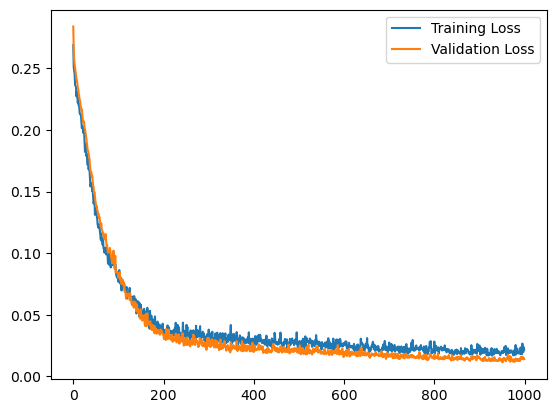

In [238]:
encoded_imgs_2 = np.array(autoencoder_2.encoder.predict(Bdd_test))

decoded_imgs_2 = autoencoder_2.decoder.predict(encoded_imgs_2[:,2])
autoencoder_2.encoder.summary()
autoencoder_2.decoder.summary()
plt.plot(history2.history["loss"], label="Training Loss")
plt.plot(history2.history["val_loss"], label="Validation Loss")
plt.legend()

Visualisation Espace Latent

In [179]:
#Enregistrement d'un fichier 
import sys

print('This message will be displayed on the screen.')

original_stdout = sys.stdout # Save a reference to the original standard output

with open('Vecteur_latent_Pendule_simple.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    for i in range(len(Bdd_test)):
        x=Bdd_test_2[i,0,0,0]
        y=Bdd_test_2[i,0,0,1]
        print(x,' ',y,'\n')
    for i in range(len(Bdd_train)):
        x=Bdd_train_2[i,0,0,0]
        y=Bdd_train_2[i,0,0,1]
        print(x,' ',y,'\n')
    sys.stdout = original_stdout

This message will be displayed on the screen.


In [289]:
#ACP
pca=PCA(n_components=2)
latent_pca=pca.fit_transform(Bdd_train_2[:,0,0])

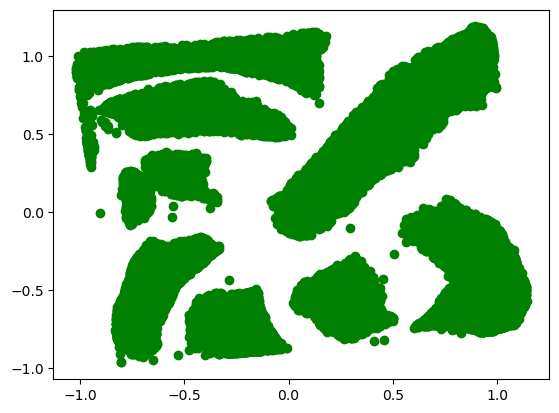

In [291]:
#Affichage de l'ACP
plt.scatter(latent_pca[:,1],latent_pca[:,0],color='green')

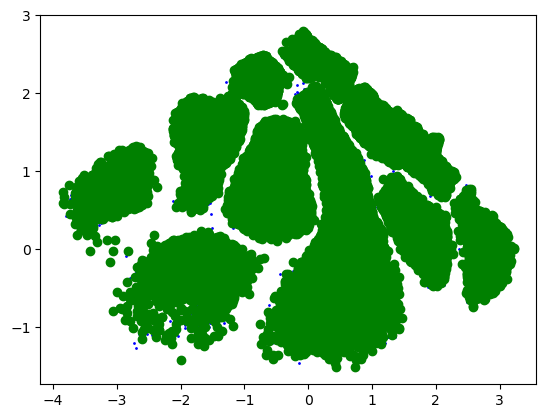

In [66]:
#Affichage espace latent (sans acp)
Bdd_test_2 = np.array(autoencoder_2.encoder.predict(Bdd_test))
Bdd_train_2 = np.array(autoencoder_2.encoder.predict(Bdd_train))

Xtr=[]
Ytr=[]
Xte=[]
Yte=[]
for i in range(len(Bdd_test)):
    x=Bdd_test_2[2,i,0]
    y=Bdd_test_2[2,i,1]
    Xte.append(x)
    Yte.append(y)
for i in range(len(Bdd_train)):
    x=Bdd_train_2[2,i,0]
    y=Bdd_train_2[2,i,1]
    Xtr.append(x)
    Ytr.append(y)

plt.scatter(Xte,Yte,color='blue',s=1)
graph=plt.scatter(Xtr,Ytr,color='green')


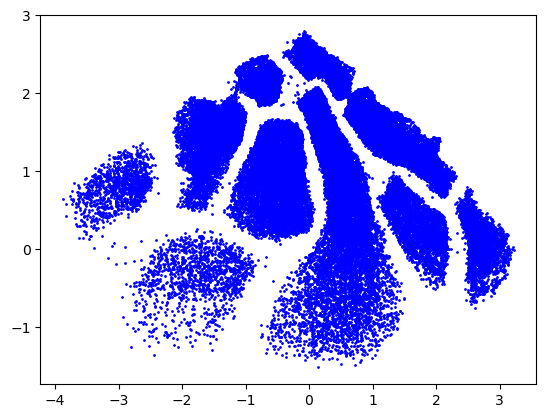

In [52]:
#Visualisation Sans couleur 
plt.scatter(Xte,Yte,color='blue',s=1)
graph=plt.scatter(Xtr,Ytr,color='blue',s=1)

In [210]:
#Lecture d'un fichier de vecteur latent
X = []
Y=[]
points=[]

with open('Vecteur_latent_Pendule_simple.txt', 'r') as file:
    for line in file:
        # Assuming each line contains a point in the format "x,y"
            values = line.strip().split()
            point = tuple(map(float, values))
            if point:
                X.append(point[0])
                Y.append(point[1])
                



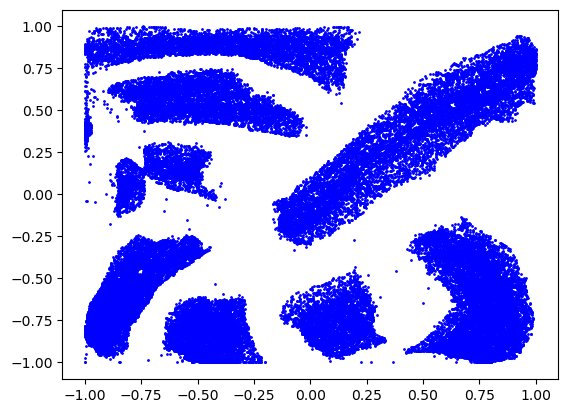

In [211]:
plt.scatter(X,Y,color='blue',s=1)


In [54]:
pca=PCA(n_components=2)
latent_pca=pca.fit_transform(Bdd_train_2[2,:])

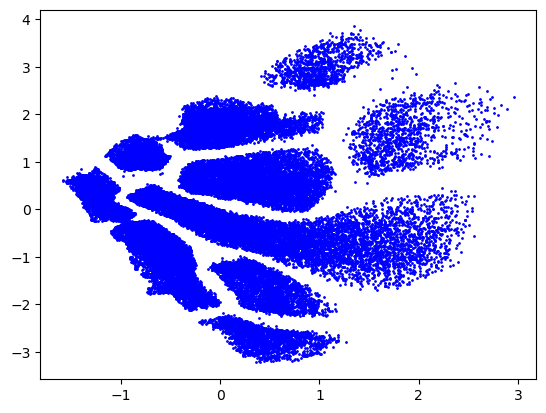

In [55]:
plt.scatter(latent_pca[:,1],latent_pca[:,0],color='blue',s=1)



In [65]:
Serie=Bdd_train_2[0:57]
Serie2=Bdd_test_2[57:114]

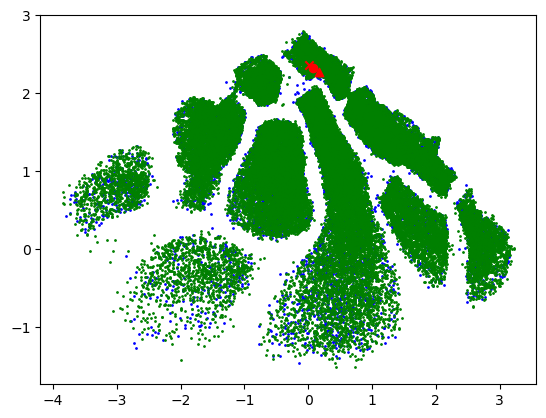

In [67]:
#Affichage de l'espace latent et les points correspondants à son parcours
X1=[]
Y1=[]
X2=[]
Y2=[]
fig=plt.figure()
ims=[]

for i in range(len(Serie)):
    x=Serie[2,i,0]
    y=Serie[2,i,1]
    X1.append(x)
    Y1.append(y)

for i in range(len(Serie2)):
    x=Serie2[2,i,0]
    y=Serie2[2,i,1]
    X2.append(x)
    Y2.append(y)

plt.scatter(Xte,Yte,color='blue',s=1)
plt.scatter(Xtr,Ytr,color='green',s=1)
plt.scatter(X1[:1],Y1[:1],color='red',marker='^')
plt.scatter(X1[1:-1],Y1[1:-1],color='red')
plt.scatter(X1[-1:],Y1[-1:],color='red',marker='x')
plt.scatter(X2[:1],Y2[:1],color='yellow',marker='^')
plt.scatter(X2[1:-1],Y2[1:-1],color='yellow')
im=plt.scatter(X2[-1:],Y2[-1:],color='yellow',marker='x')





In [215]:
#FOnction qui étant [x,y] donne l'image obtenu par décodage
def Image(x,y):
    Image=np.array([[[[x,y]]]])
    Res=autoencoder.decoder(autoencoder_2.decoder_2(Image))
    plt.imshow(Res[0])

In [232]:
#Etant donné un vecteur latent du premier ae donne ses coordonnées dans l'espace latent
def get_x_y_bdd(Bdd,index):
    Elements=Bdd[i:i+1]
    Coords=autoencoder_2.encoder_2(Elements)
    return Coords[0,0,0]

In [316]:
#Fonction qui crée la double image Espace latent actualisé + Image correspondante du phénomène physique
#Il faut donner :
#Bdd Vecteur latent de l'animaiton considérée
#Bdd_train_2 les vecteurs latents réduit via l'AE2 de toute la base de données train 
#Bdd_test_2 les vecteurs latents réduit via l'AE2 de toute la base de données de test 
#long_terme=True  optionnel, pour afficher les predictions 
#stabilisation=True  optionnel, pour que les prédictions soient stabilisées ou non 


def create_images_parcours(Bdd,Bdd_train_2,Bdd_test_2,long_terme=True,stabilisation=True):
    #Créer la figure
    plt.ion
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    #axes[1].imshow(image, cmap='gray')
    Xtr=[]
    Ytr=[]
    Xte=[]
    Yte=[]
    X1=[]
    Y1=[]

    if not long_terme:
        Serie=autoencoder_2.encoder_2(Bdd)
        Images=autoencoder.decoder(Bdd) 
    else: 
        Serie=[]
        Images=[]
        bis=Bdd[0:1]
        for i in range(0,len(Bdd)):
            aux=autoencoder_2.encoder_2(bis)
            Serie.append(aux[0])
            if stabilisation:
                bis=autoencoder.decoder(autoencoder_2.decoder_2(aux))
            else:
                bis=autoencoder.decoder(bis)
            Images.append(bis[0])
            bis=autoencoder.encoder(bis)
        Images=np.array(Images)
        Serie=np.array(Serie)
            

    for i in range(len(Bdd_test)):
        x=Bdd_test_2[i,0,0,0]
        y=Bdd_test_2[i,0,0,1]
        Xte.append(x)
        Yte.append(y)
    for i in range(len(Bdd_train)):
        x=Bdd_train_2[i,0,0,0]
        y=Bdd_train_2[i,0,0,1]
        Xtr.append(x)
        Ytr.append(y)
    

    for i in range(len(Serie)):
        x=Serie[i,0,0,0]
        y=Serie[i,0,0,1]
        X1.append(x)
        Y1.append(y)

    axes[0].scatter(Xte,Yte,color='blue')
    axes[0].scatter(Xtr,Ytr,color='green')

    image = axes[1].imshow(np.zeros((128, 256)), cmap='gray')
    axes[1].get_xaxis().set_visible(False)
    axes[1].get_yaxis().set_visible(False)

    n=len(Bdd)

    print("Creation des images\n")
    for i in range(n-1):
        axes[0].scatter(X1[i:i+1],Y1[i:i+1],color='red')
        image.set_data(Images[i])
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.savefig("Images/"+str(i)+".png")



    axes[0].scatter(X1[(n-1):],Y1[(n-1):],color='red',marker='x')
    image.set_data(Images[n-1])
    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.savefig("Images/"+str(n-1)+".png")


    print("Creation du gif")

    
#Creation du gif a partir de l'adresse de sauvegarde de la fonction précédente (create_image_parcours_AE2)


def create_gif(file,taille):
    fig=plt.figure(figsize=(20,10))
    ims=[]
    
    for i in range(0,taille):
        Pendule=mpimg.imread(file+str(i)+".png")
        plt.axis('off')
        im=plt.imshow(Pendule,animated=True,cmap='gray')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=10000)

    ani.save('latent_pred.gif')
    plt.show()
   




Creation des images

Creation du gif


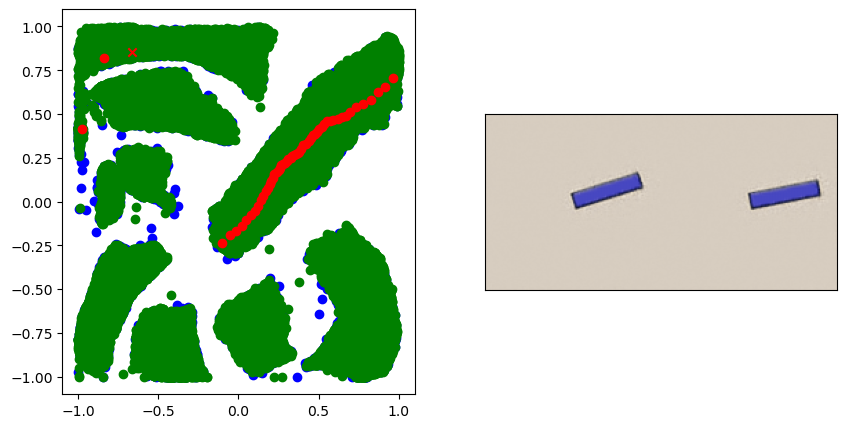

In [327]:
#Phenomne correspondant au numero de la simulation 
#Creation des images ici
phenomene=0
Test=Bdd_train[58*phenomene:58*phenomene+57]
create_images_parcours(Test,Bdd_train,Bdd_test,False,False)


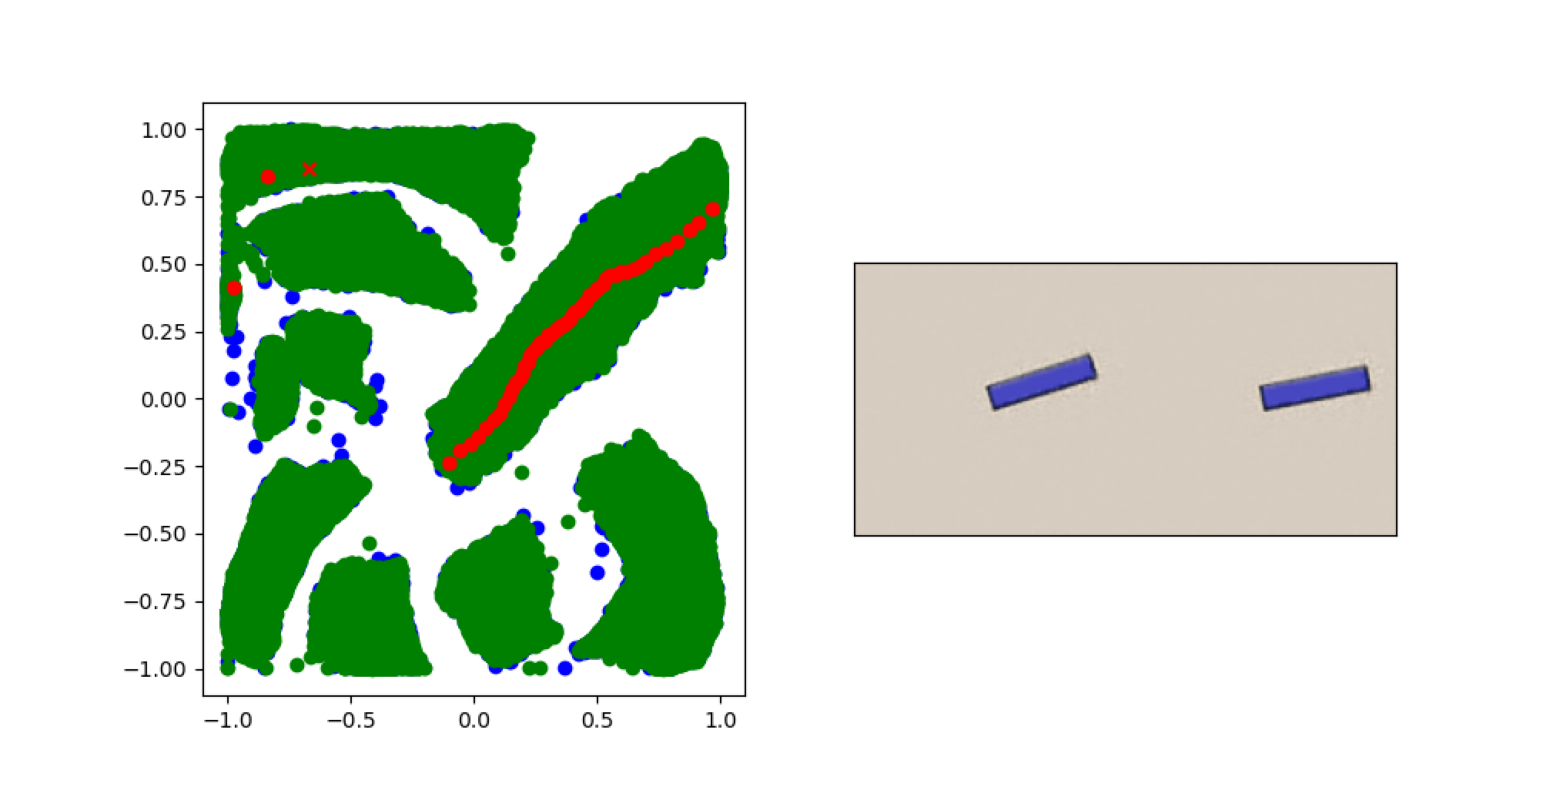

In [328]:
#creation du gif
create_gif("Images/",len(Test))